## 比较在短文本上分类的效果 

**© [SeanLee](https://github.com/SeanLee97)**

短文本分类相比长文本分类具有特征少，难学习的特点，在此对比了几个不同的分类器，SVM，FastText, BiGRU, TextCNN, CNN-BiGRU

**注意！：**由于在此公布的数据集较小，所以可能模型的比较并不是很准确，如果要用到实战上大家可以使用大规模的数据集来衡量

### 数据预处理
* 将数据切割为测试集和训练集（测试集：训练集=1：3），且所有模型共用这套切割好的数据
* 分类器采用结巴中文分词
* 预训练词向量采用word2vec

### SVM

#### 通过cross validation获得最佳参数

Using TensorFlow backend.
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.093 seconds.
Prefix dict has been built succesfully.


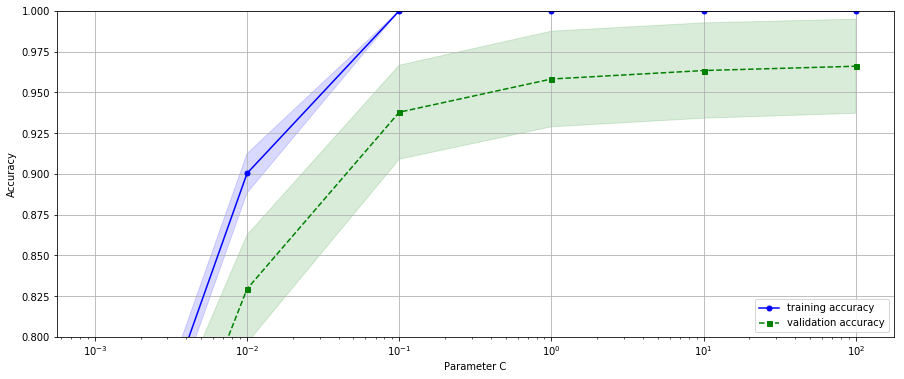

In [1]:
from evaluate import svm_train
svm_train()

从图中可以看出当惩罚系数C=10^2时SVM的精确率最高，所以SVM的参数选为C=10^2

#### 计算准确率

In [5]:
from evaluate import svm_test
svm_test(C=100)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Dumping model to file cache /tmp/jieba.cache
Dump cache file failed.
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/jieba/__init__.py", line 152, in initialize
    _replace_file(fpath, cache_file)
PermissionError: [Errno 1] Operation not permitted: '/tmp/tmpncbtgzbh' -> '/tmp/jieba.cache'
Loading model cost 1.252 seconds.
Prefix dict has been built succesfully.


svm accuracy:  0.927461139896373


以上可以得到SVM的准确率最高为 0.9378238341968912

### fasttext

In [2]:
from evaluate import fasttext_clf

args = {
	'n_epochs': 3,
	'train_path': './runtime/fasttext/train.txt',
	'test_path': './runtime/fasttext/test.txt',
	'model_path': './runtime/fasttext/model',
}
fasttext_clf(args)

fasttext accuracy 0.45077720207253885


### TextCNN， BiGRU， CNN-BiGRU

#### 没有使用预训练的词向量

Using TensorFlow backend.
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Dumping model to file cache /tmp/jieba.cache
Dump cache file failed.
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/jieba/__init__.py", line 152, in initialize
    _replace_file(fpath, cache_file)
PermissionError: [Errno 1] Operation not permitted: '/tmp/tmp9re92gxy' -> '/tmp/jieba.cache'
Loading model cost 1.309 seconds.
Prefix dict has been built succesfully.


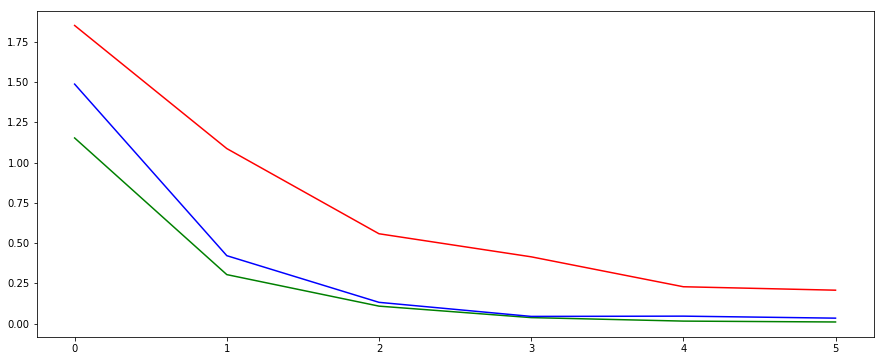

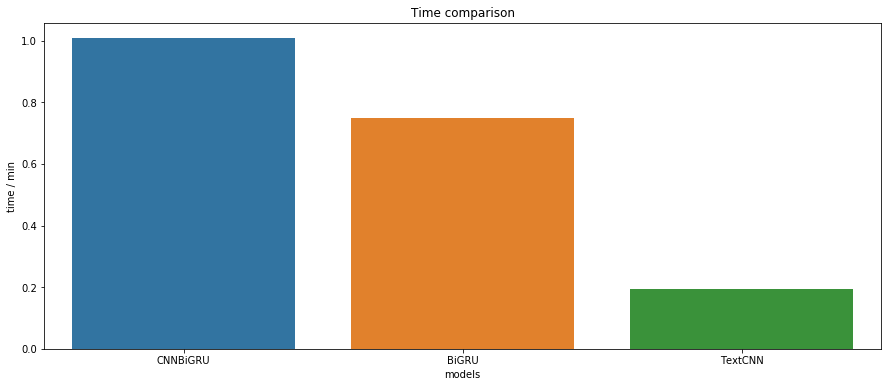

In [1]:
from evaluate import trimodel_train
args = {
	'n_epochs': 5,
	'batch_size': 1,
	'lr_rate': 0.001,
	'hidden_size': 128,
	'word2vec': False,
	'save_path': './runtime/trimodel',
	'evaluate_every': 300
}
trimodel_train(args)

load from ./runtime/trimodel1/model-1800.ckpt
load from ./runtime/trimodel2/model-1800.ckpt
load from ./runtime/trimodel3/model-1800.ckpt


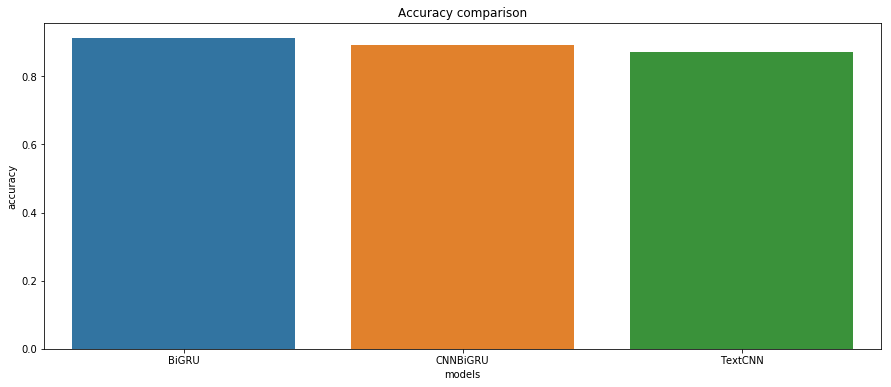

TextCNN accuracy 0.8704663212435233
BiGRU accuracy 0.9119170984455959
CNNBiGRU accuracy 0.8911917098445595


In [2]:
from evaluate import trimodel_test
args = {
	'n_epochs': 5,
	'batch_size': 1,
	'lr_rate': 0.001,
	'hidden_size': 128,
	'word2vec': False,
	'save_path': './runtime/trimodel',
	'evaluate_every': 300
}
trimodel_test(args)

#### 使用word2vec预训练词向量

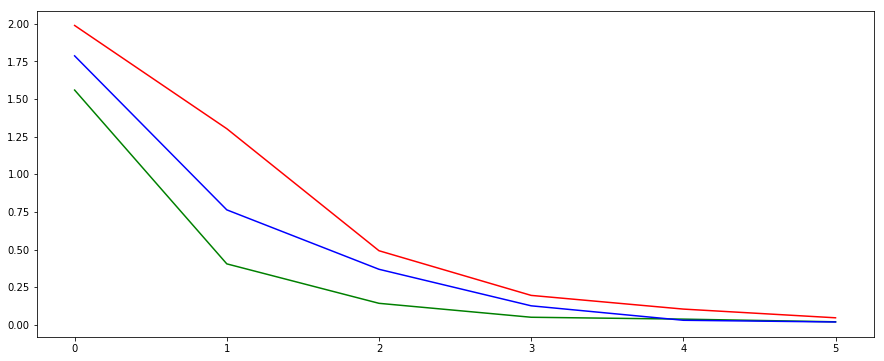

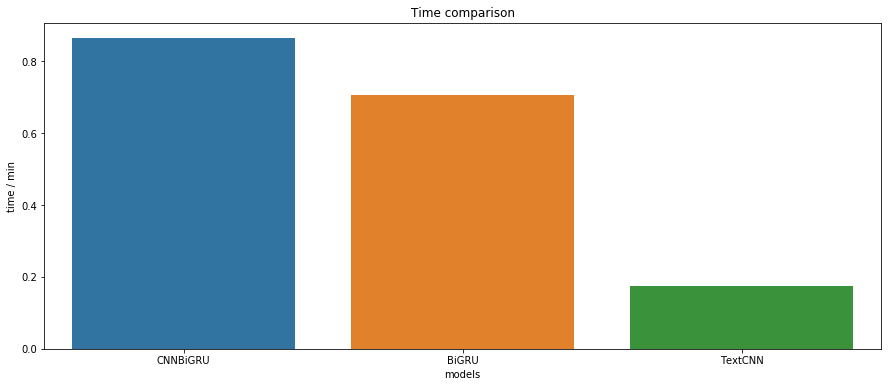

In [4]:
from evaluate import trimodel_train
args = {
	'n_epochs': 5,
	'batch_size': 1,
	'lr_rate': 0.001,
	'hidden_size': 128,
	'word2vec': True,
	'save_path': './runtime/trimodel_word2vec',
	'evaluate_every': 300
}
trimodel_train(args)

load from ./runtime/trimodel_word2vec1/model-1800.ckpt
load from ./runtime/trimodel_word2vec2/model-1800.ckpt
load from ./runtime/trimodel_word2vec3/model-1800.ckpt


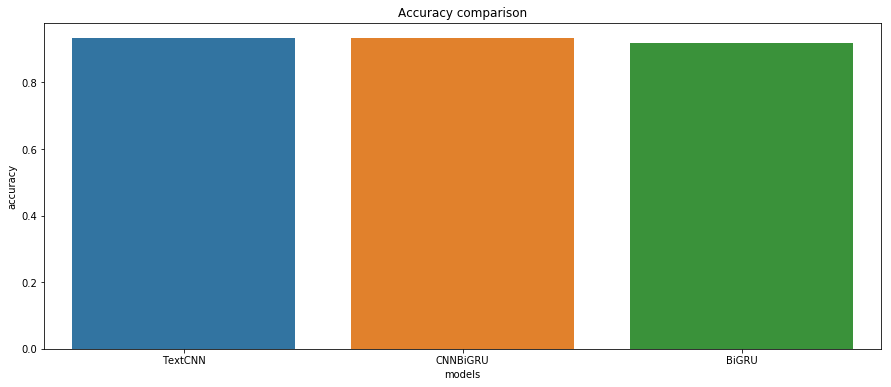

TextCNN accuracy 0.9326424870466321
BiGRU accuracy 0.917098445595855
CNNBiGRU accuracy 0.9326424870466321


In [6]:
from evaluate import trimodel_test
args = {
	'n_epochs': 5,
	'batch_size': 1,
	'lr_rate': 0.001,
	'hidden_size': 128,
	'word2vec': True,
	'save_path': './runtime/trimodel_word2vec',
	'evaluate_every': 300
}
trimodel_test(args)

可知在使用预训练词向量情况下三个模型的准确率都有所提升

### 综合评价

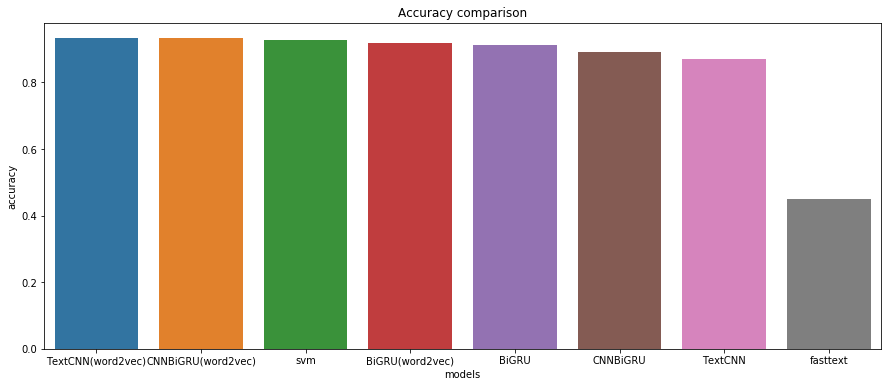

In [6]:
from evaluate import summary
summary()

由以上八个模型可以知道使用预训练的TextCNN准确率最高